Synthetisch Time Series - tägl. saisonal 
Von hier: https://towardsdatascience.com/creating-synthetic-time-series-data-67223ff08e34



# Seasonal Series2 (Sinus Seasonality / linear trend with one change / noise)

In [2]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
series = pd.date_range(start='2016-01-01', end='2021-12-31', freq='D')
df_season = pd.DataFrame(columns=['date', 'sin'])
df_season.date=series
df_season.sin = 1 * np.sin(0.01721420632 * df_season.index + 0) + 1

<AxesSubplot:xlabel='date'>

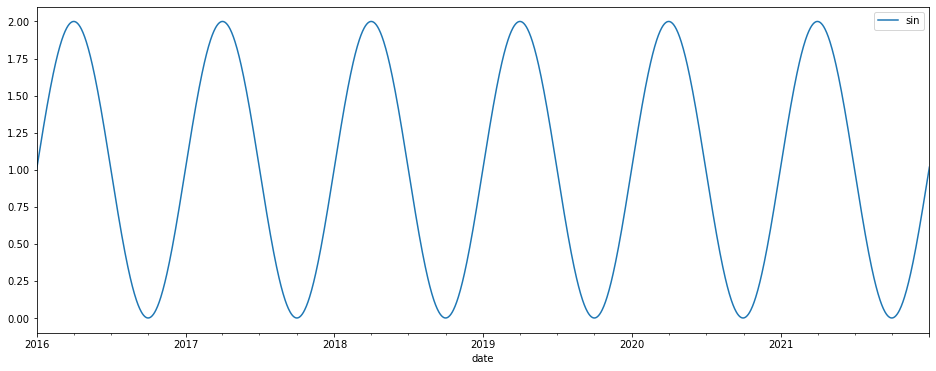

In [4]:
df_season.head()
df_season.plot(y="sin", x="date", figsize=(16,6))

## Daten normalisieren

In [5]:
df_season["sinN"] = (df_season["sin"] - df_season["sin"].min()) / (df_season["sin"].max() - df_season["sin"].min())
df_season.head()

,date,sin,sinN
0,2016-01-01,1.000000,0.500000
1,2016-01-02,1.017213,0.508607
2,2016-01-03,1.034422,0.517211
3,2016-01-04,1.051620,0.525810
4,2016-01-05,1.068802,0.534402


(17167.0, 17531.0)

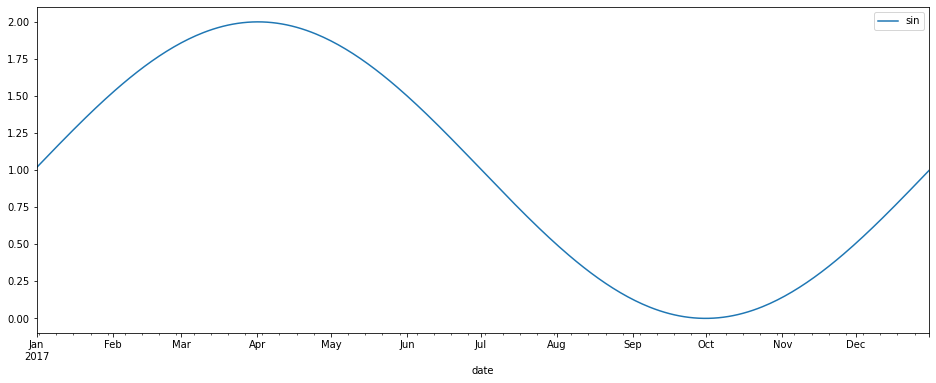

In [6]:
df_season.plot(y="sin", x="date", figsize=(16,6))
plt.xlim('2017-01-01','2017-12-31')

# montly season series

<AxesSubplot:xlabel='date'>

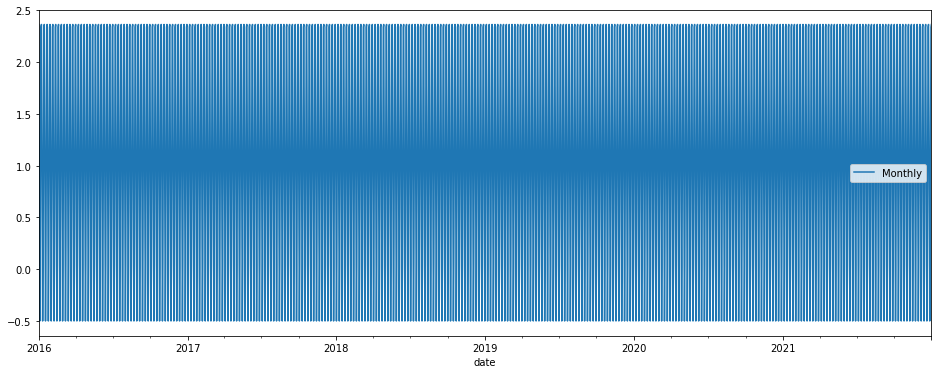

In [5]:
df_month = pd.DataFrame(columns=['date', 'Monthly'])
df_month.date=series
df_month.Monthly = 1.5 * np.sin(0.897597901 * df_season.index + 2) + 1
# für weekly = 0,897597901
# für monthly = 0.20600607564
df_month.plot(y="Monthly", x="date", figsize=(16,6))

### normalisieren

In [6]:
df_month["MonthlyN"] = (df_month["Monthly"] - df_month["Monthly"].min()) / (df_month["Monthly"].max() - df_month["Monthly"].min())
df_month.head()

,date,Monthly,MonthlyN
0,2016-01-01,2.363946,1.000000
1,2016-01-02,1.362371,0.650246
2,2016-01-03,0.087924,0.205205
3,2016-01-04,-0.499712,0.000000
4,2016-01-05,0.041966,0.189156


(16804.0, 16841.0)

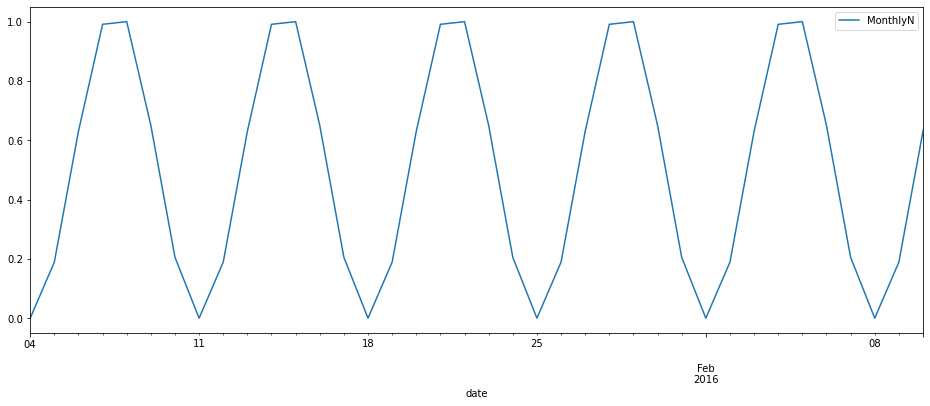

In [7]:
df_month.plot(y="MonthlyN", x="date", figsize=(16,6))
plt.xlim('2016-01-04','2016-02-10')

# Trend Series

### Daten erstellen Trend mit changepoint

In [9]:
df2 = pd.DataFrame(columns=['date', 'trend'])
df2.date=series
print(len(df2))
df2.head()

2192


,date,trend
0,2016-01-01,NaN
1,2016-01-02,NaN
2,2016-01-03,NaN
3,2016-01-04,NaN
4,2016-01-05,NaN


In [10]:
df2.loc[0:413,"trend"] = 1+0.5*np.linspace(1,414,414)
df2.loc[414:813,"trend"] = 208+0.3*np.linspace(1,400,400)
df2.loc[814:1327,"trend"] = 328-0.4*np.linspace(1,514,514)
df2.loc[1328:1828,"trend"] = 122+0.3*np.linspace(1,501,501)
df2.loc[1829:2192,"trend"] = 272+0.8*np.linspace(1,363,363)
print(df2.head())
print(df2.loc[0:413,"trend"].max())
print(df2.loc[414:813,"trend"].max())
print(df2.loc[814:1327,"trend"].min())
print(df2.loc[1328:1828,"trend"].max())

        date trend
0 2016-01-01   1.5
1 2016-01-02   2.0
2 2016-01-03   2.5
3 2016-01-04   3.0
4 2016-01-05   3.5
208.0
328.0
122.39999999999998
272.29999999999995


### Daten Normalisieren

In [11]:
df2["trendN"] = (df2["trend"] - df2["trend"].min()) / (df2["trend"].max() - df2["trend"].min())+1
df2.head()

,date,trend,trendN
0,2016-01-01,1.5,1.0
1,2016-01-02,2.0,1.000891
2,2016-01-03,2.5,1.001783
3,2016-01-04,3.0,1.002674
4,2016-01-05,3.5,1.003566


<AxesSubplot:xlabel='date'>

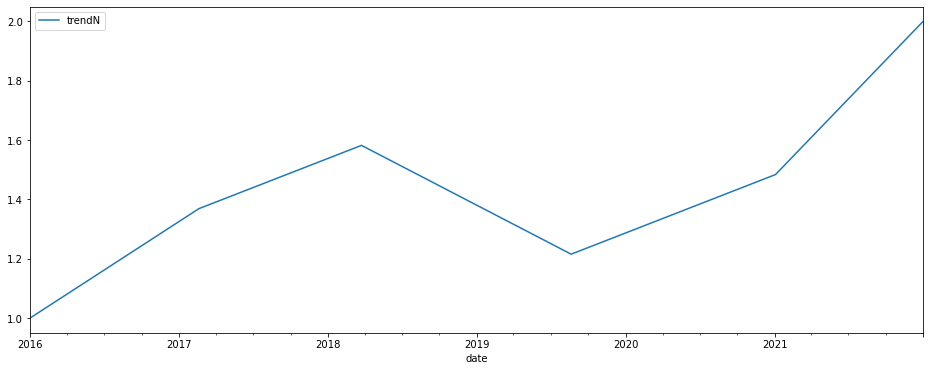

In [12]:
df2.plot(y="trendN", x="date", figsize=(16,6))

# Outlier Series

In [13]:
df_outlier = pd.DataFrame(columns=['date', 'outlier'])
df_outlier.date = series
df_outlier.outlier = 0

In [14]:
from random import seed
from random import randint
# seed random number generator
seed(2)

Value_pos = 5
value_min = -6

df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos
df_outlier.loc[randint(0,2192),'outlier'] = Value_pos


df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min
df_outlier.loc[randint(0,2192),'outlier'] = value_min


print(df_outlier[df_outlier['outlier']==Value_pos])
len(df_outlier[df_outlier['outlier']==Value_pos])
print(df_outlier[df_outlier['outlier']==value_min])
len(df_outlier[df_outlier['outlier']==value_min])

           date  outlier
146  2016-05-26        5
231  2016-08-19        5
347  2016-12-13        5
375  2017-01-10        5
648  2017-10-10        5
692  2017-11-23        5
869  2018-05-19        5
1030 2018-10-27        5
1262 2019-06-16        5
1478 2020-01-18        5
           date  outlier
112  2016-04-22       -6
147  2016-05-27       -6
1098 2019-01-03       -6
1491 2020-01-31       -6
1523 2020-03-03       -6
1611 2020-05-30       -6
1764 2020-10-30       -6
1822 2020-12-27       -6
2056 2021-08-18       -6
2085 2021-09-16       -6


10

<AxesSubplot:xlabel='date'>

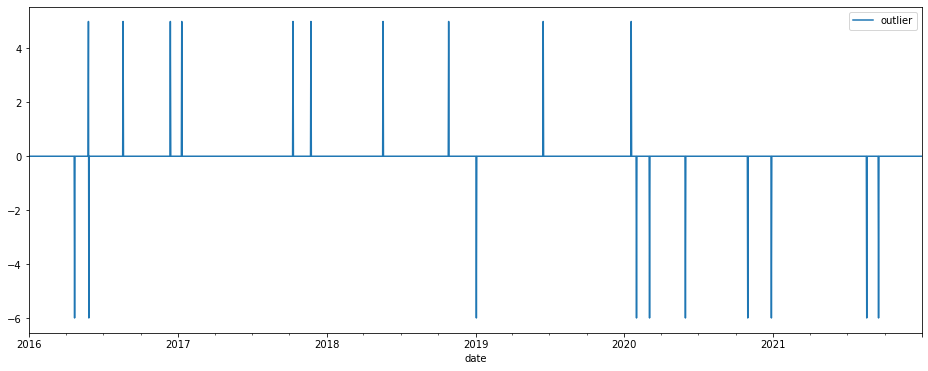

In [15]:
df_outlier.plot(y="outlier", x="date", figsize=(16,6))

# Noise Series

In [16]:
df_noise = pd.DataFrame(columns=['date', 'noise'])
df_noise.date=series
noise = np.random.normal(1,0.2,2192)
df_noise.noise=noise

In [17]:
print(df_noise.head())
print(df_noise['noise'].min())
print(df_noise['noise'].max())

        date     noise
0 2016-01-01  1.386899
1 2016-01-02  1.187663
2 2016-01-03  1.037538
3 2016-01-04  0.918400
4 2016-01-05  0.870111
0.38907775719949345
1.6300887493265805


# 

## normalize

In [18]:
#df_noise['noise'] = (df_noise['noise'] - df_noise['noise'].min()) / (df_noise['noise'].max() - df_noise['noise'].min())

<AxesSubplot:xlabel='date'>

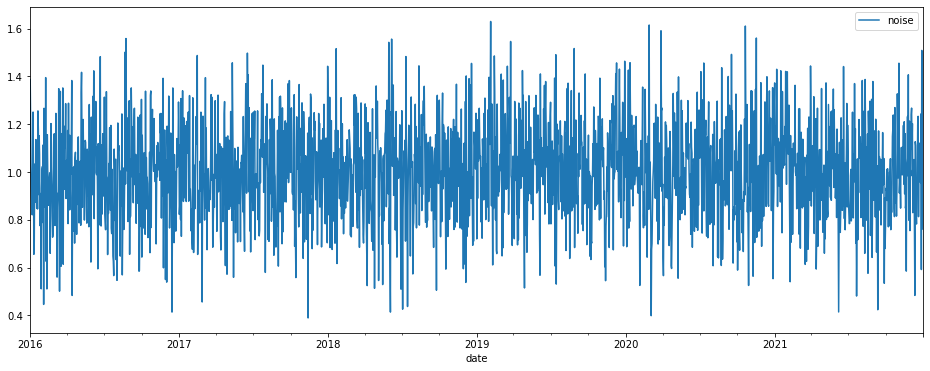

In [18]:
df_noise.plot(y="noise", x="date", figsize=(16,6))

# Additive Model 

In [19]:
df_combination = pd.DataFrame(columns=['date', 'Sum_TSN'])
df_combination.date=series
#df_combination.Sum_TS =df_season["sin"] + df_month["sinM"] + df2["trend"]
df_combination.Sum_TSN = df_season["sin"] + df_month["Monthly"] + df2["trendN"] + df_noise['noise'] + df_outlier['outlier']
df_combination.head()


,date,Sum_TSN
0,2016-01-01,5.750845
1,2016-01-02,4.568139
2,2016-01-03,3.161666
3,2016-01-04,2.472981
4,2016-01-05,2.984445


<AxesSubplot:xlabel='date'>

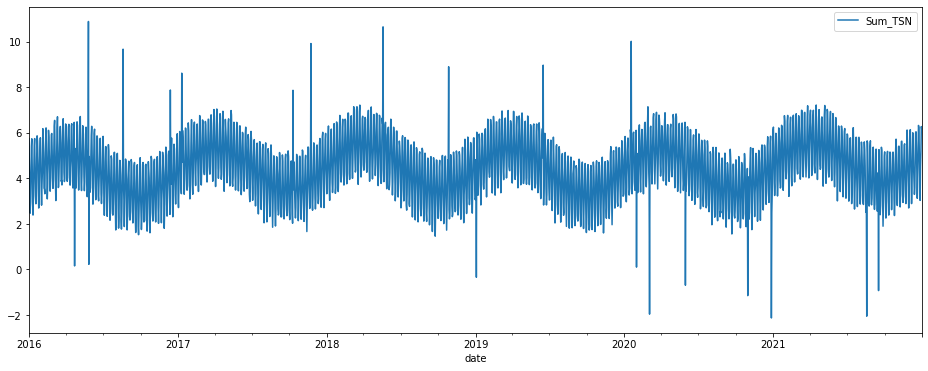

In [20]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

(17622.0, 17651.0)

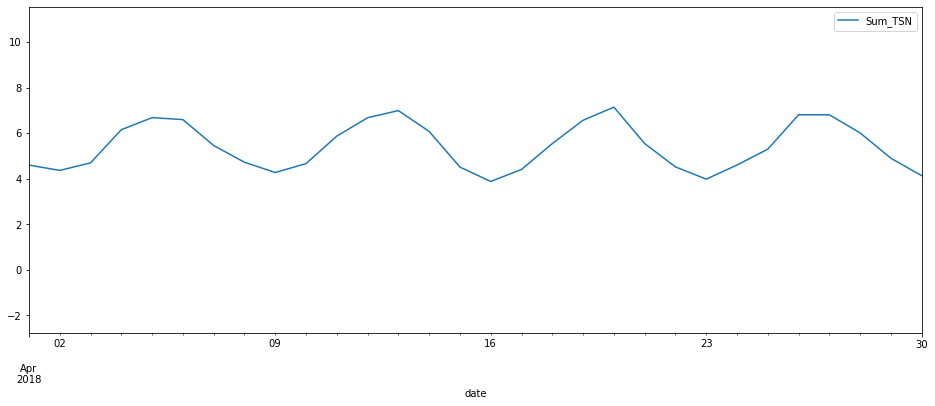

In [21]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))
plt.xlim('2018-04-01','2018-04-30')

## Normalize

In [22]:
df_combination['Sum_TSN'] = (df_combination['Sum_TSN'] - df_combination['Sum_TSN'].min()) / (df_combination['Sum_TSN'].max() - df_combination['Sum_TSN'].min())
df_combination.head()

,date,Sum_TSN
0,2016-01-01,0.605058
1,2016-01-02,0.514266
2,2016-01-03,0.406297
3,2016-01-04,0.353429
4,2016-01-05,0.392692


<AxesSubplot:xlabel='date'>

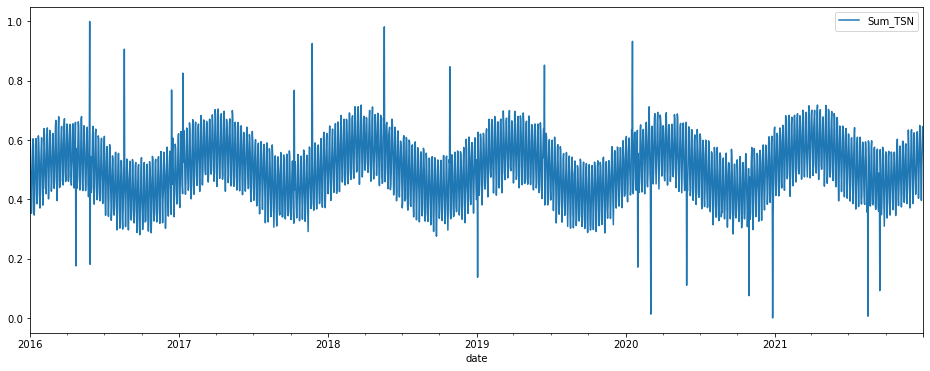

In [23]:
df_combination.plot(y="Sum_TSN", x="date", figsize=(16,6))

In [24]:
df_combination.to_csv("series2_weekly_normalized.csv")

In [32]:
df_true = pd.DataFrame(columns=['date', 'trueYaddN', 'trueYmultN','trueYearly','trueYearlyN','trueMonthly', 'trueMonthlyN', 'trueTrend','trueTrendN', 'trueNoise'])

df_true.date = series 

# additive und multiplicative Version der Zeitreihe (normalisiert)
df_true.trueYaddN = df_combination['Sum_TSN']
df_true.trueYmultN=df_multiplicative['Sum_TSN']

# Season. jährlich
df_true.trueYearly = df_season["sin"]
df_true.trueYearlyN = df_season["sinN"]

# Season. monatlich 
df_true.trueMonthly = df_month["Monthly"]
df_true.trueMonthlyN = df_month["MonthlyN"]

# Trend 
df_true.trueTrend=df2["trend"]
df_true.trueTrendN=df2["trendN"]

df_true.trueNoise = df_noise['noise']

df_true.head()

,date,trueYaddN,trueYmultN,trueYearly,trueYearlyN,trueMonthly,trueMonthlyN,trueTrend,trueTrendN,trueNoise
0,2016-01-01,0.605058,0.529672,1.000000,0.500000,2.363946,1.000000,1.5,1.0,1.386899
1,2016-01-02,0.514266,0.444995,1.017213,0.508607,1.362371,0.650246,2.0,1.000891,1.187663
2,2016-01-03,0.406297,0.344108,1.034422,0.517211,0.087924,0.205205,2.5,1.001783,1.037538
3,2016-01-04,0.353429,0.294675,1.051620,0.525810,-0.499712,0.000000,3.0,1.002674,0.918400
4,2016-01-05,0.392692,0.331538,1.068802,0.534402,0.041966,0.189156,3.5,1.003566,0.870111


<AxesSubplot:xlabel='date'>

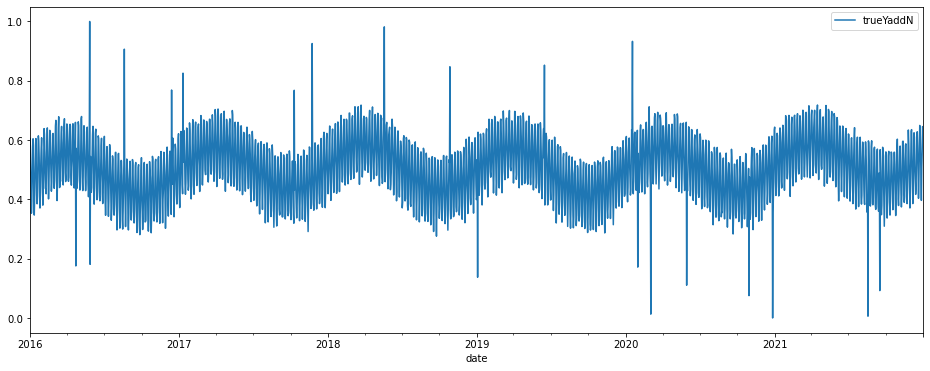

In [33]:
df_true.plot(y="trueYaddN", x="date", figsize=(16,6))

In [34]:
df_true.to_csv("series2_weekly_complete.csv",index=False)

<AxesSubplot:xlabel='date'>

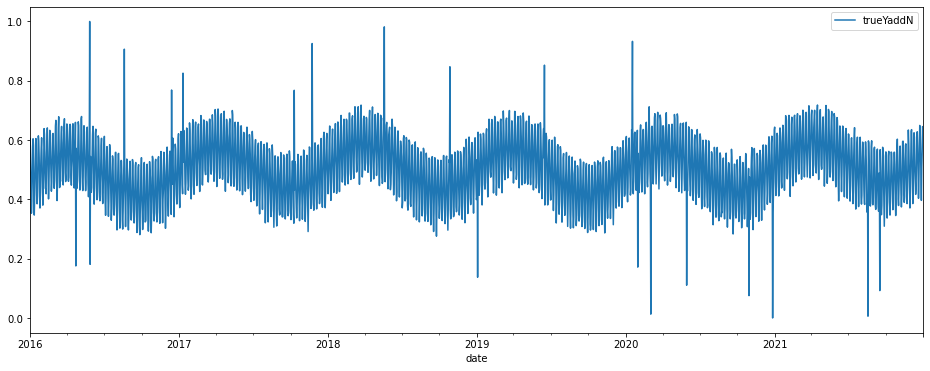

In [35]:
df_true.plot(y="trueYaddN", x="date", figsize=(16,6))

### Multiplicative Model

In [27]:
df_multiplicative = pd.DataFrame(columns=['date',  'Sum_TSN'])
df_multiplicative.date=series
#df_multiplicative.Sum_TS = df2["trend"] + df_season["sin"] * df2["trend"] + df_month["sinM"] * df2["trend"]
df_multiplicative.Sum_TSN = df2["trendN"] + df_season["sin"] * df2["trendN"] + df_month["Monthly"] * df2["trendN"] + df_noise['noise'] + df_outlier['outlier']
df_multiplicative.head()

,date,Sum_TSN
0,2016-01-01,5.750845
1,2016-01-02,4.57026
2,2016-01-03,3.163667
3,2016-01-04,2.474457
4,2016-01-05,2.988406


<AxesSubplot:xlabel='date'>

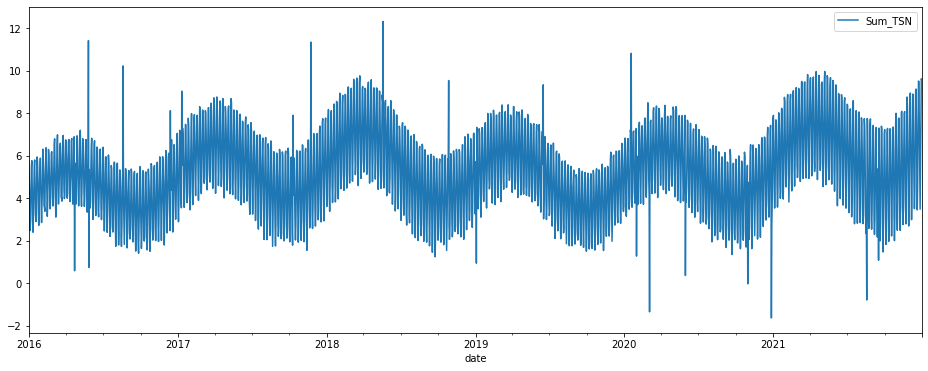

In [28]:
df_multiplicative.plot(y="Sum_TSN", x="date", figsize=(16,6))

(17532.0, 17562.0)

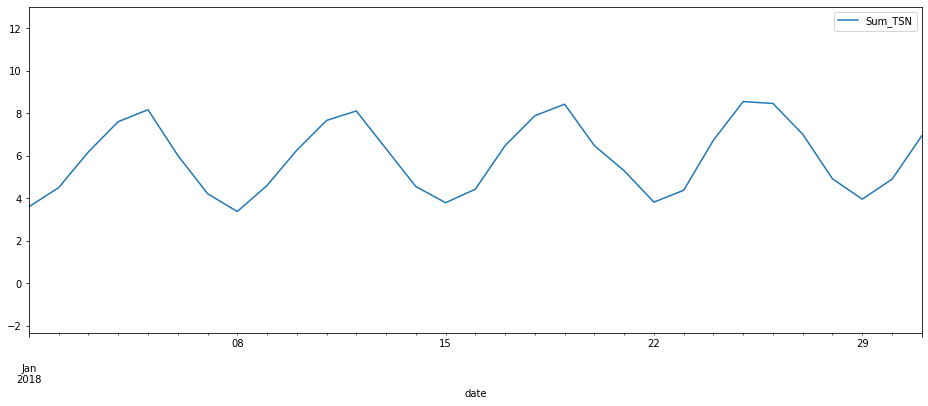

In [29]:
df_multiplicative.plot(y="Sum_TSN", x="date", figsize=(16,6))
plt.xlim('2018-01-01','2018-01-31')

        date   Sum_TSN
0 2016-01-01  0.529672
1 2016-01-02  0.444995
2 2016-01-03  0.344108
3 2016-01-04  0.294675
4 2016-01-05  0.331538


<AxesSubplot:xlabel='date'>

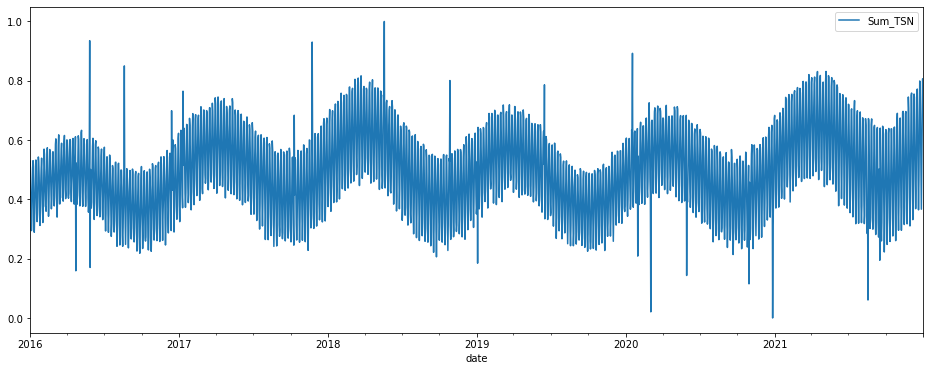

In [30]:
df_multiplicative['Sum_TSN'] = (df_multiplicative['Sum_TSN'] - df_multiplicative['Sum_TSN'].min()) / (df_multiplicative['Sum_TSN'].max() - df_multiplicative['Sum_TSN'].min())
print(df_multiplicative.head())
df_multiplicative.plot(y="Sum_TSN", x="date", figsize=(16,6))

In [31]:
df_multiplicative.to_csv("series5_weekly_normalized.csv")